In [1]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [2]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/Users/dingxianglong/Desktop/vscode/deep_learning/hw5.2_data/cats_and_dogs_small/train"
validation_dir = "/Users/dingxianglong/Desktop/vscode/deep_learning/hw5.2_data/cats_and_dogs_small/validation"

train_datagen = ImageDataGenerator(rescale=1./255) #設定訓練、測試資料的 Python 產生器，並將圖片
#像素值依 1/255 比例重新壓縮到 [0, 1]
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir, # 目標目錄
    target_size=(150, 150), # 調整所有影像大小成 150x150
    batch_size=20,
    class_mode='binary') # 因為使用二元交叉熵 binary_crossentropy 作為損失值，所以需要二位元標籤

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [6]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
)


Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - acc: 0.5045 - loss: 0.7041 - val_acc: 0.5000 - val_loss: 0.7143
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 152ms/step - acc: 0.5419 - loss: 0.6872 - val_acc: 0.5150 - val_loss: 0.6865
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - acc: 0.6177 - loss: 0.6617 - val_acc: 0.6150 - val_loss: 0.6567
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step - acc: 0.6371 - loss: 0.6402 - val_acc: 0.5890 - val_loss: 0.6561
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 146ms/step - acc: 0.6664 - loss: 0.6191 - val_acc: 0.6270 - val_loss: 0.6336
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - acc: 0.7128 - loss: 0.5702 - val_acc: 0.6880 - val_loss: 0.5858
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - acc: 0.7373 - loss: 0.5358 - val_acc: 0.7000 - val_loss: 0.5788
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - acc: 0.7603 - loss: 0.4924 - val_acc: 0.6920 - val_loss: 0.6052
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s

In [7]:
model.save('cats_and_dogs_small_1.h5')

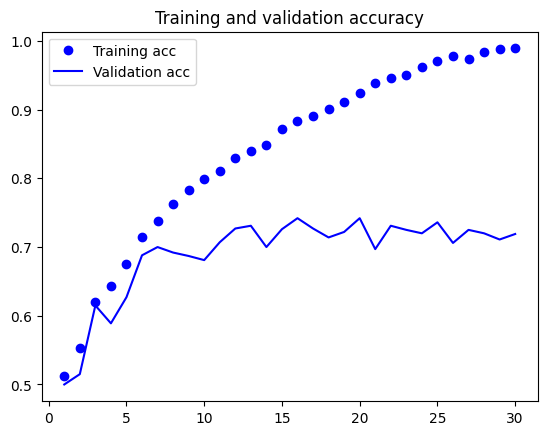

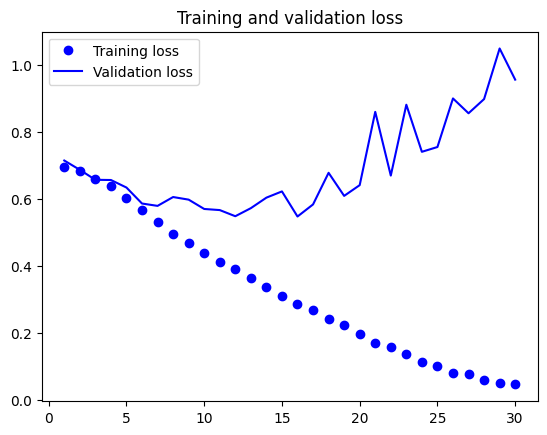

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
datagen = ImageDataGenerator(
    rotation_range=40, #隨意旋轉影像角度(0~180)
    width_shift_range=0.2, #垂直或水平隨機平移影像總寬度的20%
    height_shift_range=0.2, #垂直或水平隨機平移影像總高度的20%
    shear_range=0.2, #隨機順時針傾斜影像20度
    zoom_range=0.2, #隨機縮放影像20%
    horizontal_flip=True, #隨機水平翻轉一半影像 (非左右對稱才有效)
    fill_mode='nearest') #新建影像填補像素(旋轉或偏移影像出現空白時使用)

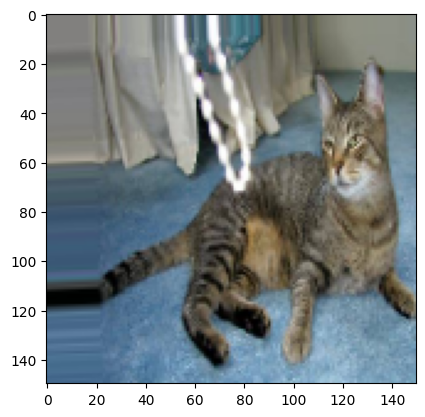

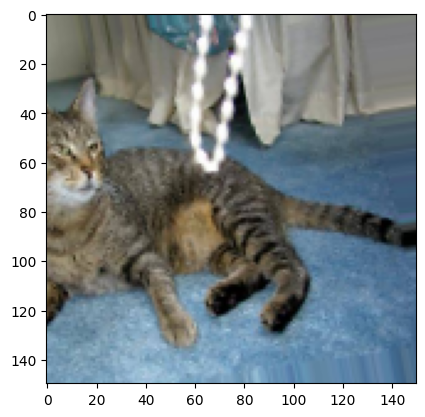

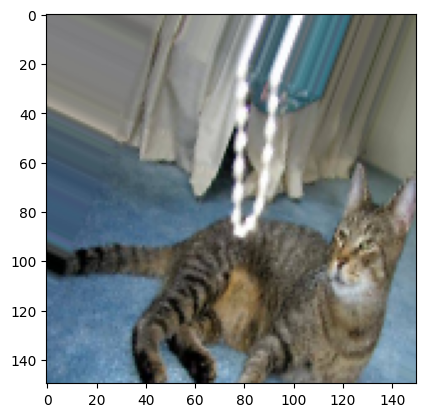

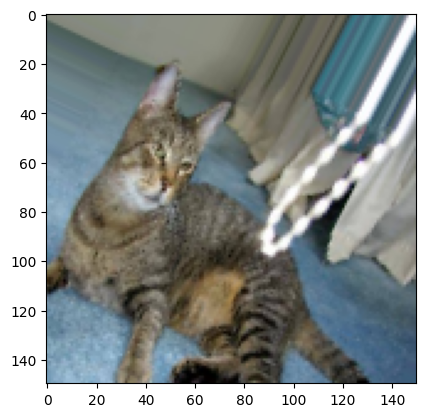

In [10]:
import os, shutil
import keras.utils as image #影像預先處理工具模組
from keras.preprocessing import image

train_cats_dir = "/Users/dingxianglong/Desktop/vscode/deep_learning/hw5.2_data/cats_and_dogs_small/train/cats"

fnames = [os.path.join(train_cats_dir, fname) for
    fname in os.listdir(train_cats_dir)]
img_path = fnames[3] #選擇一張影像來擴充
img = image.load_img(img_path, target_size=(150, 150)) #讀取影像並調整大小
x = image.img_to_array(img) #轉成shape=(150,150,3)的numpy矩陣
x = x.reshape((1, ) + x.shape) #調整shape=(1,150,150,3) 1張150*150像素的
#彩色影像
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #在這裡加入 Dropout 層 (丟棄 50 %)
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True, )
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
train_dir, # 目標目錄
target_size=(150, 150), # 所有圖像大小調整成 150×150
batch_size=20,
class_mode='binary') # 因為使用二元交叉熵 binary_crossentropy 作為損失，所以需要二元標籤
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
)


Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 134ms/step - acc: 0.5077 - loss: 0.6939 - val_acc: 0.5000 - val_loss: 0.6898
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 127ms/step - acc: 0.5226 - loss: 0.6923 - val_acc: 0.5400 - val_loss: 0.6790
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - acc: 0.5505 - loss: 0.6837 - val_acc: 0.5990 - val_loss: 0.6647
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - acc: 0.5506 - loss: 0.6839 - val_acc: 0.5380 - val_loss: 0.7060
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 125ms/step - acc: 0.5739 - loss: 0.6701 - val_acc: 0.6010 - val_loss: 0.6487
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - acc: 0.5921 - loss: 0.6585 - val_acc: 0.6160 - val_loss: 0.6471
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 123ms/step - acc: 0.5725 - loss: 0.6638 - val_acc: 0.6140 - val_loss: 0.6340
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 122ms/step - acc: 0.6261 - loss: 0.6441 - val_acc: 0.6380 - val_loss: 0.6286
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s

In [15]:
model.save('cats_and_dogs_small_2.h5')

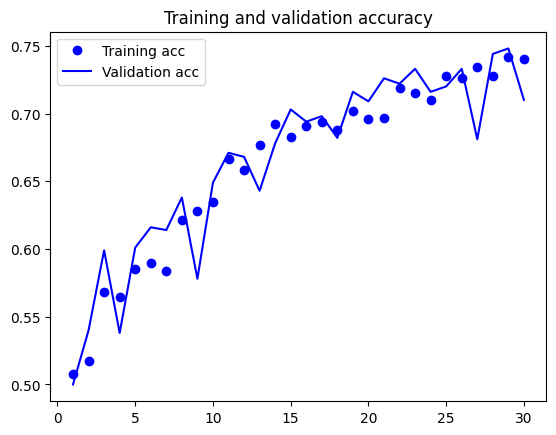

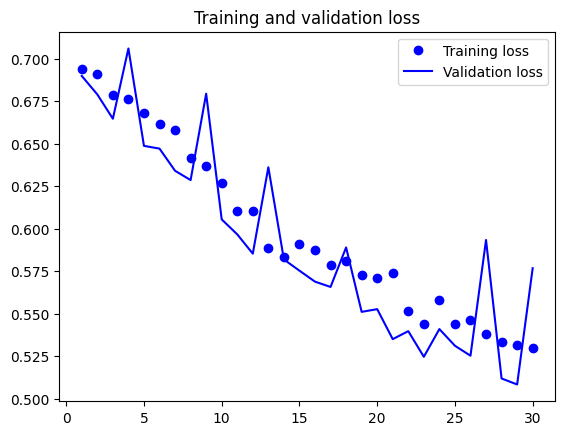

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np

# 加载模型
model = load_model('cats_and_dogs_small_2.h5')

# 要预测的图像路径
img_path = '/Users/dingxianglong/Desktop/vscode/deep_learning/hw5.2_data/cats_and_dogs_small/test/dogs/dog.1500.jpg'  # 替换为你的图像路径

# 加载图像并进行预处理
img = image.load_img(img_path, target_size=(150, 150))  # 保证图像尺寸与训练时一致
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # 添加一个批次维度
img_array /= 255.0  # 归一化像素值，与训练时保持一致

# 进行预测
predictions = model.predict(img_array)

# 获取预测结果
if predictions[0] > 0.5:
    print("预测结果：狗")
else:
    print("预测结果：猫")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[0.17563188]]
